In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.fft import fft, ifft
from scipy.signal import periodogram
import ordpy 
import statsmodels.api as sm
from scipy.signal import butter,filtfilt
from matplotlib.pyplot import figure
from os import listdir
from os.path import isfile, join
from statsmodels.tsa.stattools import adfuller
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import pickle
import re
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
from scipy.stats import shapiro 
from scipy.stats import kstest
import EntropyHub

In [2]:
D1_data=pd.read_pickle('../data/dataset/D1_puregooddata_split_31032023.pkl')

In [3]:
class pain_monitering_D1:
    def __init__(self,PID):
        self.PID=PID
        self.D1_rating=[]
        self.D1_time=[]
        self.D1_prediction=-1
        self.D1_confidence=-1
    def __str__(self):
        print("participant: "+self.PID)
        print("Day 1 rating: "+str(len(self.D1_rating))+" sessions")
        print("Day 1 timing: "+str(len(self.D1_time))+" sessions")
        print("Day 1 prediction: "+ str(self.D1_prediction))
        print("Day 1 confidence: "+ str(self.D1_confidence))
        return ""
    def update_rating_time(self,rating,time):
        self.D1_rating=rating
        self.D1_time=time
    def update_prediction_confidence(self,pred,conf):
        self.D1_prediction=pred
        self.D1_confidence=conf

In [6]:
Day1_participant_list=[]
for i,pid in enumerate(D1_data['PID']):
    partcipant=pain_monitering_D1(pid)
    partcipant.update_rating_time(D1_data['rating'][i],D1_data['time'][i])
    partcipant.update_prediction_confidence(D1_data['prediction'][i],D1_data['confidence'][i])
    Day1_participant_list.append(partcipant)
print(str(len(Day1_participant_list))+" participants")

79 participants


### log transfermation

In [7]:
Day1_participant_list_log=[]
for part in Day1_participant_list:
    partcipant=pain_monitering_D1(part.PID)
    partcipant.update_prediction_confidence(part.D1_prediction,part.D1_confidence)
    rating_log_list=[]
    for rating in part.D1_rating:
        add_one=np.repeat(1,len(rating))
        rating_np_log=np.log(rating+add_one)
        rating_log_list.append(rating_np_log)
    partcipant.update_rating_time(rating_log_list,part.D1_time)
    Day1_participant_list_log.append(partcipant)

### Histogram and Q-Q plot for each participant

In [8]:
rating_list=[]
for part in Day1_participant_list_log:
    rating_perpart=[]
    for rating in part.D1_rating:
        rating_perpart.extend(rating)
    rating_list.append(rating_perpart)
print(str(len(rating_list))+" participants")

79 participants


In [ ]:
for i,rating in enumerate(rating_list):
    plt.xlim(0,np.log(12))
    plt.xlabel("rating")
    plt.title(Day1_participant_list_log[i].PID+" rating distribution")
    plt.hist(rating, bins=30)
    plt.savefig("../data/image/Day_1_log_hist/"+Day1_participant_list_log[i].PID+"_log.jpg",bbox_inches='tight')
    plt.cla()

In [ ]:
for i,rating in enumerate(rating_list):
    rating_np=np.array(rating)
    fig=sm.qqplot(rating_np,line='45')
    plt.savefig("../data/image/Day_1_log_QQ/"+Day1_participant_list[i].PID+"_log.jpg")
    plt.cla()

### Shapiro-Wilk Test

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


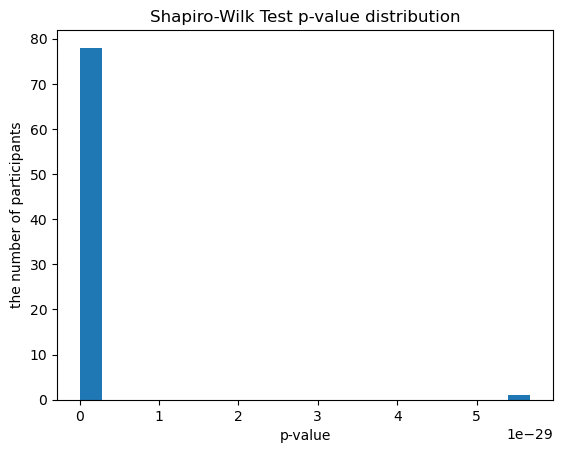

0 participants are assumed to be normally distributed
max pvalue PID:62e17900c4ff2316a7297ce6
max pvalue: 5.676809715058839e-29


In [10]:
shapiro_list=[]
norm_count=0
max_pvalue=0
max_PID=""
for i,rating in enumerate(rating_list):
    shap=shapiro(rating)
    shapiro_list.append(shap.pvalue)
    if i==0:
        max_pvalue=shap.pvalue
        max_PID=Day1_participant_list_log[i].PID
    else:
        if shap.pvalue>max_pvalue:
            max_pvalue=shap.pvalue
            max_PID=Day1_participant_list_log[i].PID
    if shap.pvalue>0.05:
        norm_count+=1

plt.xlabel("p-value")
plt.ylabel("the number of participants")
plt.title("Shapiro-Wilk Test p-value distribution")
plt.hist(shapiro_list, bins=20)
plt.show()
print(str(norm_count)+" participants are assumed to be normally distributed")
print("max pvalue PID:"+max_PID)
print("max pvalue: "+str(max_pvalue))

### Kolmogorov-Smirnov Test

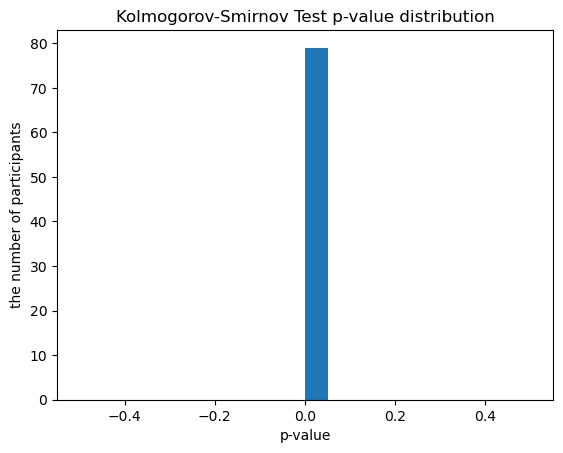

0 participants are assumed to be normally distributed


In [37]:
kstest_list=[]
ks_norm_count=0
for rating in rating_list:
    ks_data=kstest(rating,"norm")
    kstest_list.append(ks_data.pvalue)
    if ks_data.pvalue>0.05:
        ks_norm_count+=1

plt.xlabel("p-value")
plt.ylabel("the number of participants")
plt.title("Kolmogorov-Smirnov Test p-value distribution")
plt.hist(kstest_list, bins=20)
plt.show()
print(str(ks_norm_count)+" participants are assumed to be normally distributed")

In [38]:
for i,part in enumerate( Day1_participant_list):
    if part.PID=="5a9ea9fe1ade740001b92063":
        ks_data=kstest(rating_list[i],"norm")
        shap=shapiro(rating_list[i])
        print(ks_data.pvalue)
        print(shap.pvalue)

0.0
1.7822134483030075e-36
